<a href="https://colab.research.google.com/github/MHRDYN7/Tensorflow-Keras/blob/main/Basic_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import mnist

#Load Data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [20]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [21]:
x_train = x_train.reshape(-1, 28 * 28).astype('float32')/255

In [23]:
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0

#Model

##1.Sequential API

In [30]:
model = keras.Sequential([
    keras.layers.Dense(512, input_shape=(28*28,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

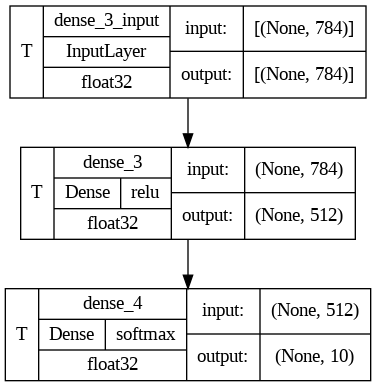

In [32]:
from keras.utils import plot_model
plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True,
    show_trainable=True,
)

##2.Functional API

In [36]:
inputs = keras.Input(shape=(28*28))
layer1 = keras.layers.Dense(512, activation='relu')(inputs)
layer2 = keras.layers.Dense(10, activation='softmax')(layer1)

ModelF = keras.Model(inputs=inputs, outputs=layer2)

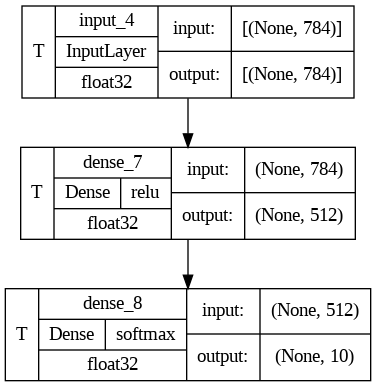

In [37]:
plot_model(
    ModelF,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True,
    show_trainable=True,
)

#Training
##Compile the model with
######1.Loss_fn
######2.Optimizer
######3.Metrics

In [42]:
ModelF.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [43]:
ModelF.fit(x=x_train, y=y_train, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2635 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1103 - accuracy: 0.9675
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0702 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0503 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0362 - accuracy: 0.9894


In [45]:
ModelF.evaluate(x_test, y_test, batch_size=32, verbose=2)

313/313 - 1s - loss: 0.0596 - accuracy: 0.9818 - 992ms/epoch - 3ms/step


[0.05963201820850372, 0.9818000197410583]